<a href="https://colab.research.google.com/github/ryu-i-engineer/ImageAnnotationChallenge/blob/main/notebooks/ImageAnnotationChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ImageAnnotationChallenge

## Overview : 概要

### Project target : プロジェクト目標

- 普通のECサイトにおける検索機能について､改善方法を検討する
- 画像認識によるタグ付けの開発を優先する
- メンバーも実際のプロジェクト経験をもらいつつ､デモプロジェクトの開発と記事を作成できるまで頑張る

In English:
- Consider the ways how to improve search function on e-commerce site.
- Prioritize the development of tagging by image recognition.
- The members will do our best until creating an article and developing demo project, gaining project experience.


### Study scope : 学習範囲

* Note記事を書く
* 画像認識によるタグ付けを優先して開発する
* 日本語･英語両方タグ付けできるようにする

In English:

* Write a note article
* Develop tagging system by image recognition in priority
* The system becomes able to tag  in Japanese and English


### Repository

* [TOP](https://github.com/ryu-i-engineer/ImageAnnotationChallenge)
* [Projects](https://github.com/ryu-i-engineer/ImageAnnotationChallenge/projects/2)

## Reference

- https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub
- https://www.tensorflow.org/tutorials/images/segmentation

### About Transfer learning

#### Domain problem

- [転移学習：機械学習の次のフロンティアへの招待](https://qiita.com/icoxfog417/items/48cbf087dd22f1f8c6f4#%E8%BB%A2%E7%A7%BB%E5%AD%A6%E7%BF%92%E3%81%AE%E5%8F%96%E3%82%8A%E7%B5%84%E3%82%80%E5%95%8F%E9%A1%8C)

## Screw types

## Reference

https://www.homestratosphere.com/types-of-screws/

### Overview

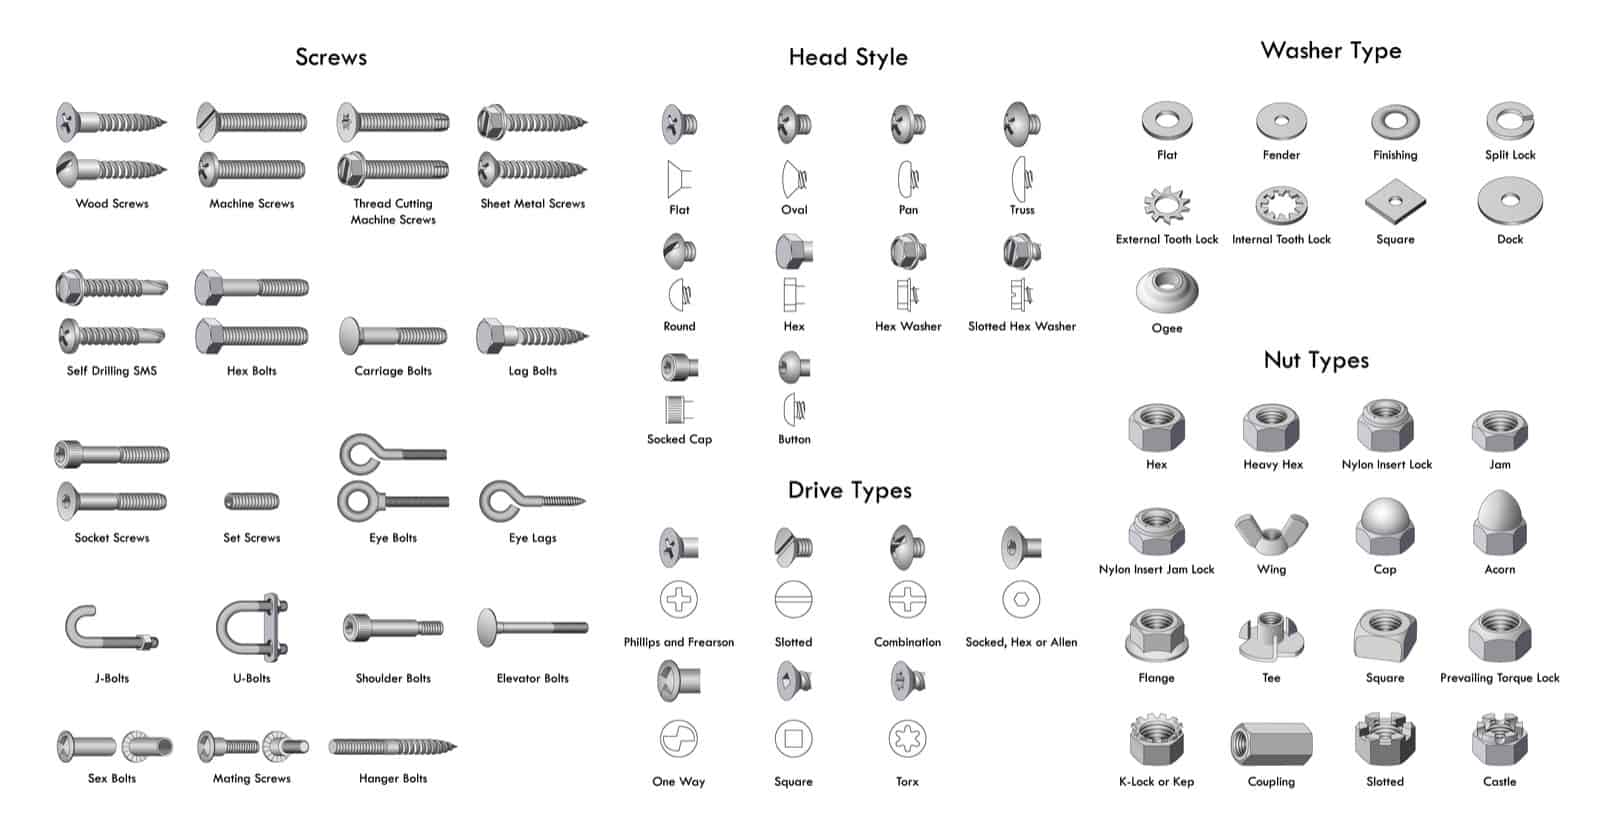

### Screw drives

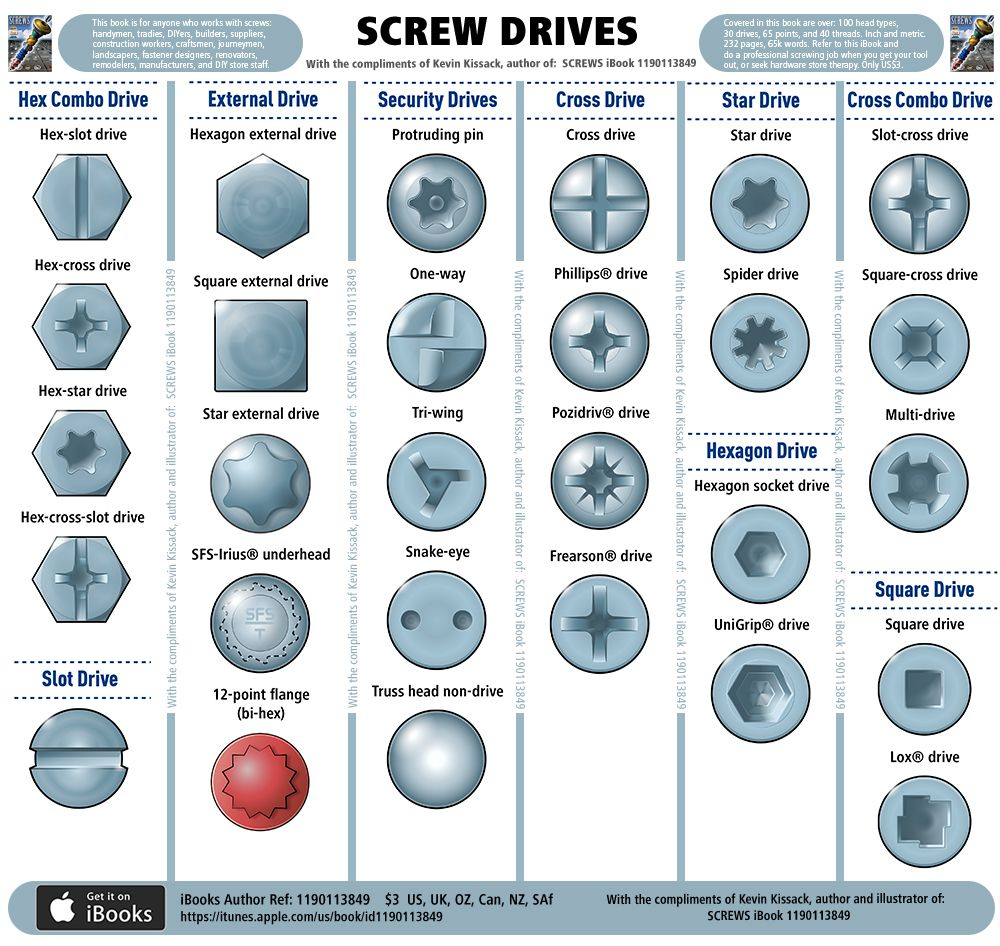

### Screw points

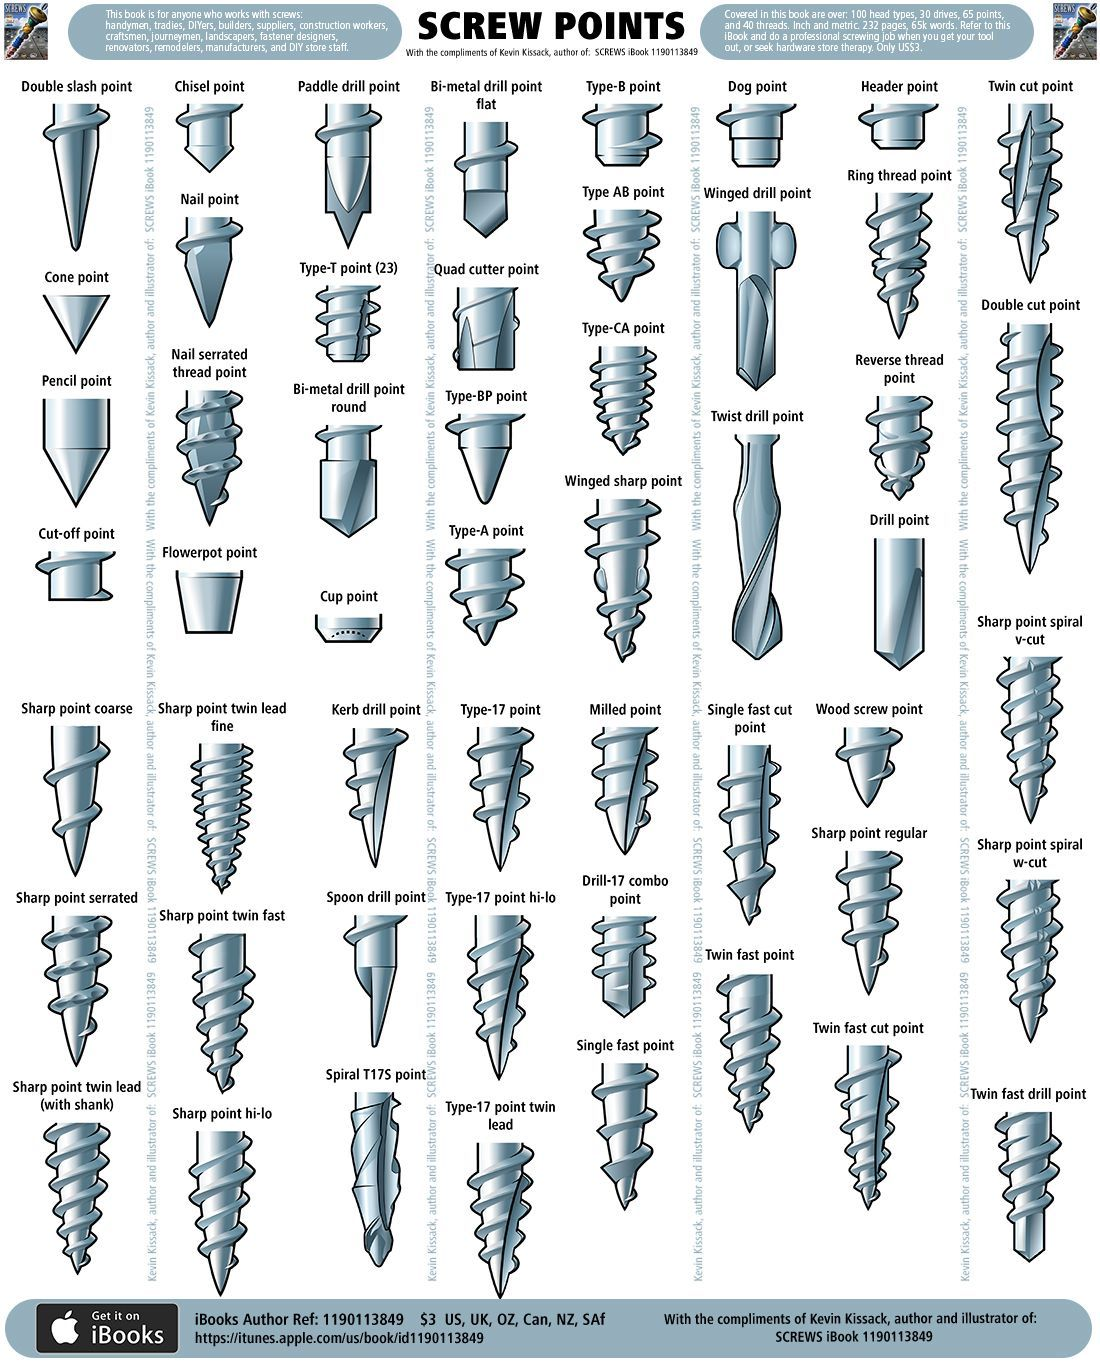

## Dummy data

- 3D
- CAD
- Items should not be there.
- Utilities something like "Accessories" and "Components"

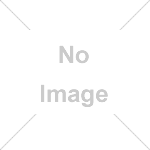
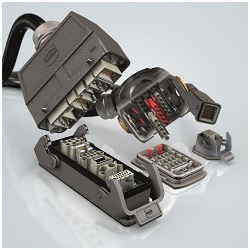
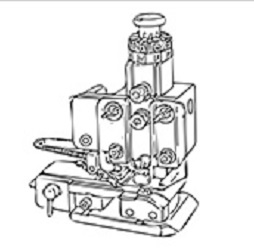
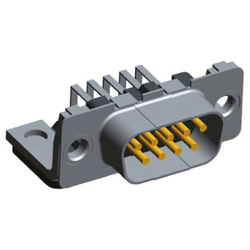

## Define lables and binarize

#### CSV format

```csv
"directory","filename","tag1","tag2","tag3","tag4","tag5","tag6","tag7","tag8","tag9","tag10"
"nuts","test.jpg","nuts","metal","hex",
"bolts","test2.jpg","nuts","non-metal","screws","flat"
```

#### Code

In [1]:
import pandas as pd
df = pd.read_csv("./inputs/fasteners/fasteners_label.csv")
# df = pd.read_csv("./inputs/fasteners/nuts_label.csv")
df.dropna(axis=1, how="all")

,directory,filename,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11
0,screw,000000.jpg,Silver,Sqaure drive,Bugle Head,Stainless Steel,Deck Screw,NaN,NaN,NaN,NaN,NaN,NaN
1,screw,000001.jpg,Silver,Sqaure drive,Stainless Steel,Deck Screw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,screw,000002.jpg,Silver,Sqaure drive,Bugle Head,Stainless Steel,Deck Screw,NaN,NaN,NaN,NaN,NaN,NaN
3,screw,000003.jpg,Blue,Phillips drive,Flat Head,Carbon Steel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,screw,000004.jpg,Blue,Phillips drive,Flat Head,Carbon Steel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,screw,003987.jpg,Burgundy,Hex socket drive,Hex socket drive,Washer Head,Steel,Roofing Screw,Type-17 point hi-lo,NaN,NaN,NaN,NaN
3794,screw,003988.jpg,Burgundy,Hex socket drive,Hex socket drive,Washer Head,Steel,Roofing Screw,Type-17 point hi-lo,NaN,NaN,NaN,NaN
3795,screw,003989.jpg,Bronze,Hex socket drive,Hex socket drive,Washer Head,Steel,Roofing Screw,Type-17 point hi-lo,NaN,NaN,NaN,NaN
3796,screw,003990.jpg,Bronze,Hex socket drive,Hex socket drive,Washer Head,Steel,Roofing Screw,Type-17 point hi-lo,NaN,NaN,NaN,NaN


In [2]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

df = df.dropna(axis=1, how='all') # save memory and process usage
df = df.fillna('None') # to avoid error

result = mlb.fit_transform( df.drop(columns=['directory', 'filename']).values) # drop not tagging cols

bin_df = pd.DataFrame(result, columns=mlb.classes_).drop('None', axis=1) # drop non-useless col.
bin_df = df.drop(df.columns[2:], axis=1).join(bin_df)
bin_df.head()

,directory,filename,6 Lobe Head,Allen,Aluminum,Binding,Black,Blue,Bolt,Brass,...,"Truss Head""",Truss head,Type-17 point,Type-17 point hi-lo,Washer Head,White,Wood Screw,Yellow,Zinc Plated Steel,non drive
0,screw,000000.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,screw,000001.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,screw,000002.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,screw,000003.jpg,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,screw,000004.jpg,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# get tag list
bin_df.drop(['directory', 'filename'], axis=1).columns.to_list()

['6 Lobe Head',
 'Allen',
 'Aluminum',
 'Binding',
 'Black',
 'Blue',
 'Bolt',
 'Brass',
 'Bronze',
 'Brown',
 'Bugle Head',
 'Burgundy',
 'Button Head',
 'Carbon Steel',
 'Carriage Bolt',
 'Charcoal',
 'Deck Screw',
 'Dowel Screw',
 'Drill point',
 'Drywall Screw',
 'Fillister',
 'Flange Head',
 'Flat Head',
 'Framing Drywall Screw',
 'Framing Self Drilling Drywall Screw',
 'Frearson drive',
 'Fully Threaded Head',
 'Gray',
 'Green',
 'Hanger Bolt',
 'Hex Slotted Head',
 'Hex bolts',
 'Hex socket drive',
 'Hex washer',
 'Indented Truss',
 'Ivory',
 'Knurled Head',
 'Lag Screw',
 'Laminating Drywall Screw',
 'Machine Screw',
 'Machine Screw Anchor Set Tool',
 'No Head',
 'Non-Serrated Flange Bolt',
 'One Way Head',
 'Oval Head',
 'Oversize Truss',
 'Pan Head',
 'Pancake Head',
 'Phillips drive',
 'Plow Bolt',
 'Red',
 'Roofing Screw',
 'Round Head',
 'Sammy Rod Hanger Anchors',
 'Self Drilling Drywall Screw',
 'Serrated Flange Bolt',
 'Set Screw',
 'Sheet Metal Screw',
 'Shoulder Bolt'

In [4]:
N = len(df)

just_num = max(len(l) for l in bin_df.drop(['directory', 'filename'], axis=1).columns)+1

for k, label in enumerate(bin_df.drop(['directory', 'filename'], axis=1).columns):
    pos = sum(bin_df[label] == 1)
    print(f"{label.ljust(just_num)}\tPos samples: {pos:<5}\tNeg samples: {N-pos:<5} \t Pos of total: {100 * pos / N:.2f}%")

6 Lobe Head                         	Pos samples: 12   	Neg samples: 3786  	 Pos of total: 0.32%
Allen                               	Pos samples: 1062 	Neg samples: 2736  	 Pos of total: 27.96%
Aluminum                            	Pos samples: 15   	Neg samples: 3783  	 Pos of total: 0.39%
Binding                             	Pos samples: 3    	Neg samples: 3795  	 Pos of total: 0.08%
Black                               	Pos samples: 303  	Neg samples: 3495  	 Pos of total: 7.98%
Blue                                	Pos samples: 14   	Neg samples: 3784  	 Pos of total: 0.37%
Bolt                                	Pos samples: 3    	Neg samples: 3795  	 Pos of total: 0.08%
Brass                               	Pos samples: 147  	Neg samples: 3651  	 Pos of total: 3.87%
Bronze                              	Pos samples: 93   	Neg samples: 3705  	 Pos of total: 2.45%
Brown                               	Pos samples: 9    	Neg samples: 3789  	 Pos of total: 0.24%
Bugle Head                   

#### Tag list

See also,
- [Fasterner(wiki)](https://en.wikipedia.org/wiki/Fastener)
- [Nuts(wiki)](https://en.wikipedia.org/wiki/Nut_(hardware))
- [Wahser(wiki)](https://en.wikipedia.org/wiki/Washer_(hardware))
- [Electrical cable(wiki)](https://en.wikipedia.org/wiki/Electrical_cable)

##### Components


- accessories
- caps
- cables
- connector
- conduits
- bolts
- ducts
- fully-threaded
- image_seonsor
- io_board
- mount
- nuts
- pins
- rings
- screws
- tape
- tie
- tools
- washer
- wire

##### Materials


- metal
- nylon
- plastic
- celamic

##### Shapes

- ac_servo
- av_antenna
- audio_video
- branching
- clinching
- clip
- crimp
- cylindrical
- display
- domed
- eye_screws
- fiber_optic
- flanged
- flat
- gauge
- hex
- high
- inserts
- knurled
- lan
- lock
- machine_keys
- micro
- precise
- printer
- ps2
- rectangular
- rivet
- rc232
- scsi
- slot
- spacer
- thumb_ornamental
- usb
- wing
- weld

## Codes

### Using TF Hub for Transfer learning

#### Prepare

In [5]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

import datetime

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7483639787706761356
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4853137408
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6486473276970481527
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


#### Visualization of model training history

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Load dataset

In [6]:
LABELS = bin_df.columns[2:].to_list()
LABELS[:5]

['6 Lobe Head', 'Allen', 'Aluminum', 'Binding', 'Black']

In [7]:
import glob, os
data_dir = "./inputs/fasteners/screw"
# data_dir = "./inputs/fasteners/nut"
filenames = glob.glob(os.path.join(data_dir, "*.jpg"))

In [8]:
ds_size = len(filenames)
print("Number of images in folders: ", ds_size)

filelist_ds = tf.data.Dataset.from_tensor_slices(filenames[:])

ds_size=filelist_ds.cardinality().numpy()
print("Number of selected samples for dataset: ", ds_size)

Number of images in folders:  3798
Number of selected samples for dataset:  3798


In [9]:
filenames[:5]

['./inputs/fasteners/screw\\000000.jpg',
 './inputs/fasteners/screw\\000001.jpg',
 './inputs/fasteners/screw\\000002.jpg',
 './inputs/fasteners/screw\\000003.jpg',
 './inputs/fasteners/screw\\000004.jpg']

In [10]:
def get_label(file_path):
  parts = tf.strings.split(file_path, os.path.sep)
  file_name= parts[-1]
  return tf.squeeze(bin_df[bin_df['filename']==file_name][LABELS])

In [11]:
IMG_WIDTH, IMG_HEIGHT = 64 , 64
def decode_img(img):
  #color images
  img = tf.image.decode_jpeg(img, channels=3) 
  #convert unit8 tensor to floats in the [0,1]range
  img = tf.image.convert_image_dtype(img, tf.float32)
  #resize
  img = tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

  img = tf.image.random_flip_left_right(img, seed=42)
  img = tf.image.random_flip_up_down(img, seed=42)
#   img = tf.keras.preprocessing.image.random_zoom(img, (0.5, 1.5))
#   img = tf.keras.preprocessing.image.random_rotation(img, 0.2)
#   img = tf.image.random_contrast(img, 0.8, 1.2, seed=42)
  return img

In [12]:
def combine_images_labels(file_path: tf.Tensor):
  label = get_label(file_path)
  label = tf.cast(label, tf.int64)
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [13]:
train_ratio = 0.80
ds_train=filelist_ds.take(ds_size*train_ratio)
ds_val=filelist_ds.skip(ds_size*train_ratio)

In [14]:
BATCH_SIZE = 64

In [15]:
ds_train=ds_train.map(lambda x: tf.py_function(func=combine_images_labels,
          inp=[x], Tout=(tf.float32,tf.int64)),
          num_parallel_calls=tf.data.AUTOTUNE,
          deterministic=False)

In [16]:
ds_val= ds_val.map(lambda x: tf.py_function(func=combine_images_labels,
          inp=[x], Tout=(tf.float32,tf.int64)),
          num_parallel_calls=tf.data.AUTOTUNE,
          deterministic=False)

In [17]:
def covert_onehot_string_labels(label_string,label_onehot):
  labels=[]
  for i, label in  enumerate(label_string):
     if label_onehot[i]:
       labels.append(label)
  if len(labels)==0:
    labels.append("NONE")
  return labels

25 samples from the dataset


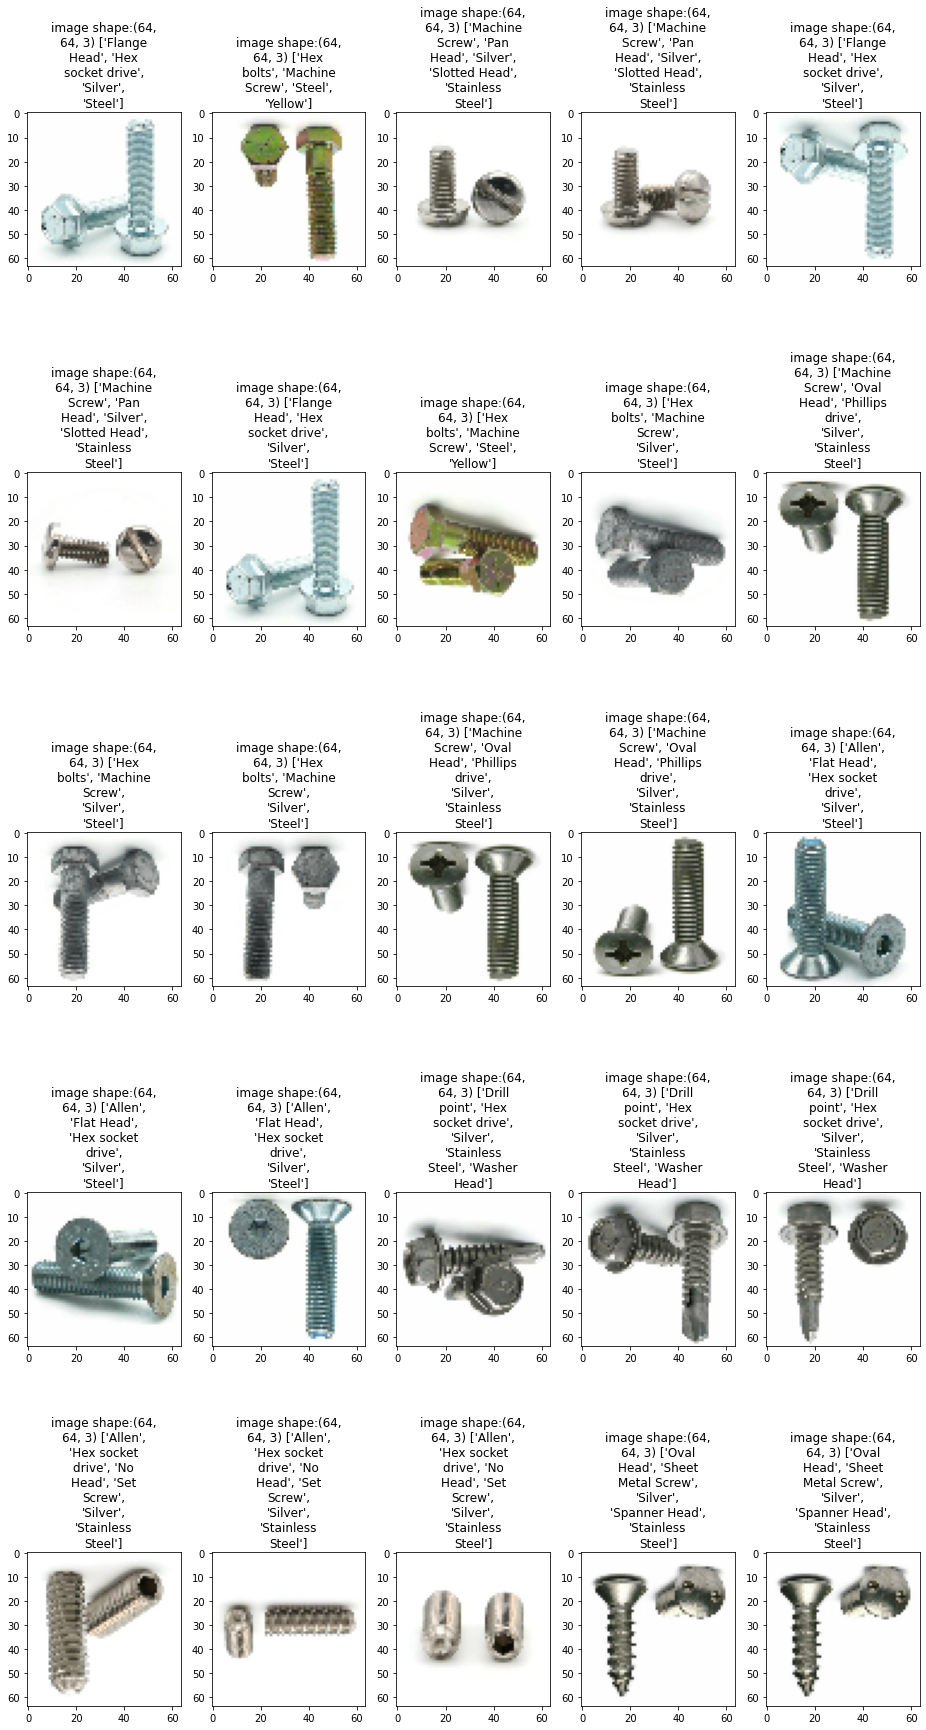

In [18]:
from textwrap import wrap

def show_samples(dataset):
  fig=plt.figure(figsize=(16, 16))
  fig.set_figheight(32)
  columns = 5
  rows = 5
  print(columns*rows,"samples from the dataset")
  i=1
  for a,b in dataset.take(columns*rows): 
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(a))
    plt.title('\n'.join(wrap("image shape:"+ str(a.shape)+" "+ 
              str(covert_onehot_string_labels(LABELS,b.numpy())), 16)))
    i=i+1
  plt.show()
show_samples(ds_val)

In [19]:
#buffer_size = ds_train_resize_scale.cardinality().numpy()/10
#ds_resize_scale_batched=ds_raw.repeat(3).shuffle(buffer_size=buffer_size).batch(64, )

ds_train_batched=ds_train.batch(BATCH_SIZE).cache().prefetch(tf.data.experimental.AUTOTUNE) 
ds_val_batched=ds_val.batch(BATCH_SIZE).cache().prefetch(tf.data.experimental.AUTOTUNE)

print("Number of batches in train: ", ds_train_batched.cardinality().numpy())
print("Number of batches in test: ",  ds_val_batched.cardinality().numpy())

Number of batches in train:  48
Number of batches in test:  12


## Create model

In [20]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
inception_v3 = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
effienct_v2 = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"


feature_extractor_model = effienct_v2

In [21]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(IMG_WIDTH, IMG_HEIGHT, 3),
    trainable=False
)

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# aug = ImageDataGenerator(
#     rotation_range=25,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

In [22]:
num_classes = len(LABELS)

base_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    feature_extractor_layer,
    # tf.keras.layers.Dense(num_classes, activation='relu'),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation='sigmoid'),
])
base_model.build((None,)+(IMG_WIDTH, IMG_HEIGHT, 3))
model = base_model

### Create custom loss function

In [23]:
weight_balanced = []
N = len(bin_df)

for k, label in enumerate(bin_df.drop(['directory', 'filename'], axis=1).columns):
    weight_balanced.append((bin_df[label] == 1).sum())

max_count = max(weight_balanced)

for i in range(len(weight_balanced)):
    weight_balanced[i] = max_count / weight_balanced[i]

weight_balanced = tf.constant(weight_balanced, dtype=tf.float32)
weight_balanced

<tf.Tensor: shape=(89,), dtype=float32, numpy=
array([241.       ,   2.7231638, 192.8      , 964.       ,   9.544555 ,
       206.57143  , 964.       ,  19.67347  ,  31.096775 , 321.33334  ,
        46.64516  , 241.       ,  10.365591 ,  20.223776 ,  30.125    ,
       241.       ,  60.25     , 160.66667  ,  12.05     , 241.       ,
       964.       ,  32.133335 ,   3.861148 , 964.       , 964.       ,
       964.       , 241.       ,  40.166668 , 120.5      ,  96.4      ,
       964.       ,   5.807229 ,   2.1406367,  17.527273 ,  80.333336 ,
       241.       , 160.66667  ,  40.166668 , 964.       ,   2.0027702,
       964.       ,   9.64     , 964.       , 137.71428  ,  16.066668 ,
       192.8      ,   6.07563  , 241.       ,   4.185239 , 160.66667  ,
       120.5      ,  18.538462 ,  26.777779 , 361.5      , 482.       ,
       107.111115 ,  10.041667 ,   7.53125  , 964.       , 192.8      ,
         1.       , 482.       , 321.33334  , 964.       , 482.       ,
       241.      

In [24]:
# create custom loss function
def custom_weighted_bce(y_true, y_pred):
    loss = tf.nn.weighted_cross_entropy_with_logits(tf.cast(y_true, tf.float32), y_pred, weight_balanced)
    return tf.reduce_mean(loss, axis=1)

In [25]:
model.compile(
  optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0005),
  loss=custom_weighted_bce,
  metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              4049564   
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 89)                114009    
Total params: 4,163,573
Trainable params: 114,009
Non-trainable params: 4,049,564
_________________________________________________________________


## Train model

In [26]:
NUM_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.001, patience=3
)

history = model.fit(ds_train_batched,
                    validation_data=ds_val_batched,
                    epochs=NUM_EPOCHS,
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/100
48/48 [==============================] - 1456s 30s/step - loss: 1.2326 - binary_accuracy: 0.8588 - val_loss: 1.1911 - val_binary_accuracy: 0.9470
Epoch 2/100
48/48 [==============================] - 2s 42ms/step - loss: 1.1712 - binary_accuracy: 0.9525 - val_loss: 1.1704 - val_binary_accuracy: 0.9524
Epoch 3/100
48/48 [==============================] - 2s 42ms/step - loss: 1.1443 - binary_accuracy: 0.9571 - val_loss: 1.1561 - val_binary_accuracy: 0.9544
Epoch 4/100
48/48 [==============================] - 2s 42ms/step - loss: 1.1193 - binary_accuracy: 0.9584 - val_loss: 1.1426 - val_binary_accuracy: 0.9535
Epoch 5/100
48/48 [==============================] - 2s 41ms/step - loss: 1.0963 - binary_accuracy: 0.9586 - val_loss: 1.1296 - val_binary_accuracy: 0.9522
Epoch 6/100
48/48 [==============================] - 2s 41ms/step - loss: 1.0771 - binary_accuracy: 0.9586 - val_loss: 1.1184 - val_binary_accuracy: 0.9522
Epoch 7/100
48/48 [==============================] - 2s 41ms/s

## Evaluate

In [27]:
ds= ds_val_batched
print("Test Accuracy: ", model.evaluate(ds)[1])

12/12 [==============================] - 0s 31ms/step - loss: 1.0127 - binary_accuracy: 0.9639
Test Accuracy:  0.9639266729354858


In [28]:
ds=ds_val
predictions= model.predict(ds.batch(batch_size=50).take(1))
# print("A sample output from the last layer (model) ", predictions[0])
y=[]
print("10 Sample predictions:")
for (pred,(a,b)) in zip(predictions,ds.take(50)):
  pred[pred>0.5]=1
  pred[pred<=0.5]=0
  print("predicted    : " , str(covert_onehot_string_labels(LABELS, pred)))
  print("Actual Label: ", str(covert_onehot_string_labels(LABELS,b.numpy())))
  print("")
  y.append(b.numpy())

10 Sample predictions:
predicted    :  ['Hex bolts', 'Machine Screw', 'Steel', 'Yellow']
Actual Label:  ['Machine Screw', 'Pan Head', 'Silver', 'Slotted Head', 'Stainless Steel']

predicted    :  ['Hex bolts', 'Machine Screw', 'Steel', 'Yellow']
Actual Label:  ['Hex bolts', 'Machine Screw', 'Steel', 'Yellow']

predicted    :  ['Machine Screw', 'Pan Head', 'Silver', 'Stainless Steel']
Actual Label:  ['Hex bolts', 'Machine Screw', 'Steel', 'Yellow']

predicted    :  ['Hex socket drive', 'Machine Screw', 'Silver', 'Stainless Steel']
Actual Label:  ['Flange Head', 'Hex socket drive', 'Silver', 'Steel']

predicted    :  ['6 Lobe Head', 'Allen', 'Flat Head', 'Machine Screw', 'Pan Head', 'Silver', 'Stainless Steel', 'Truss Head']
Actual Label:  ['Machine Screw', 'Pan Head', 'Silver', 'Slotted Head', 'Stainless Steel']

predicted    :  ['Flange Head', 'Silver', 'Steel']
Actual Label:  ['Flange Head', 'Hex socket drive', 'Silver', 'Steel']

predicted    :  ['Flange Head', 'Pan Head', 'Silver', 

25 samples from the dataset


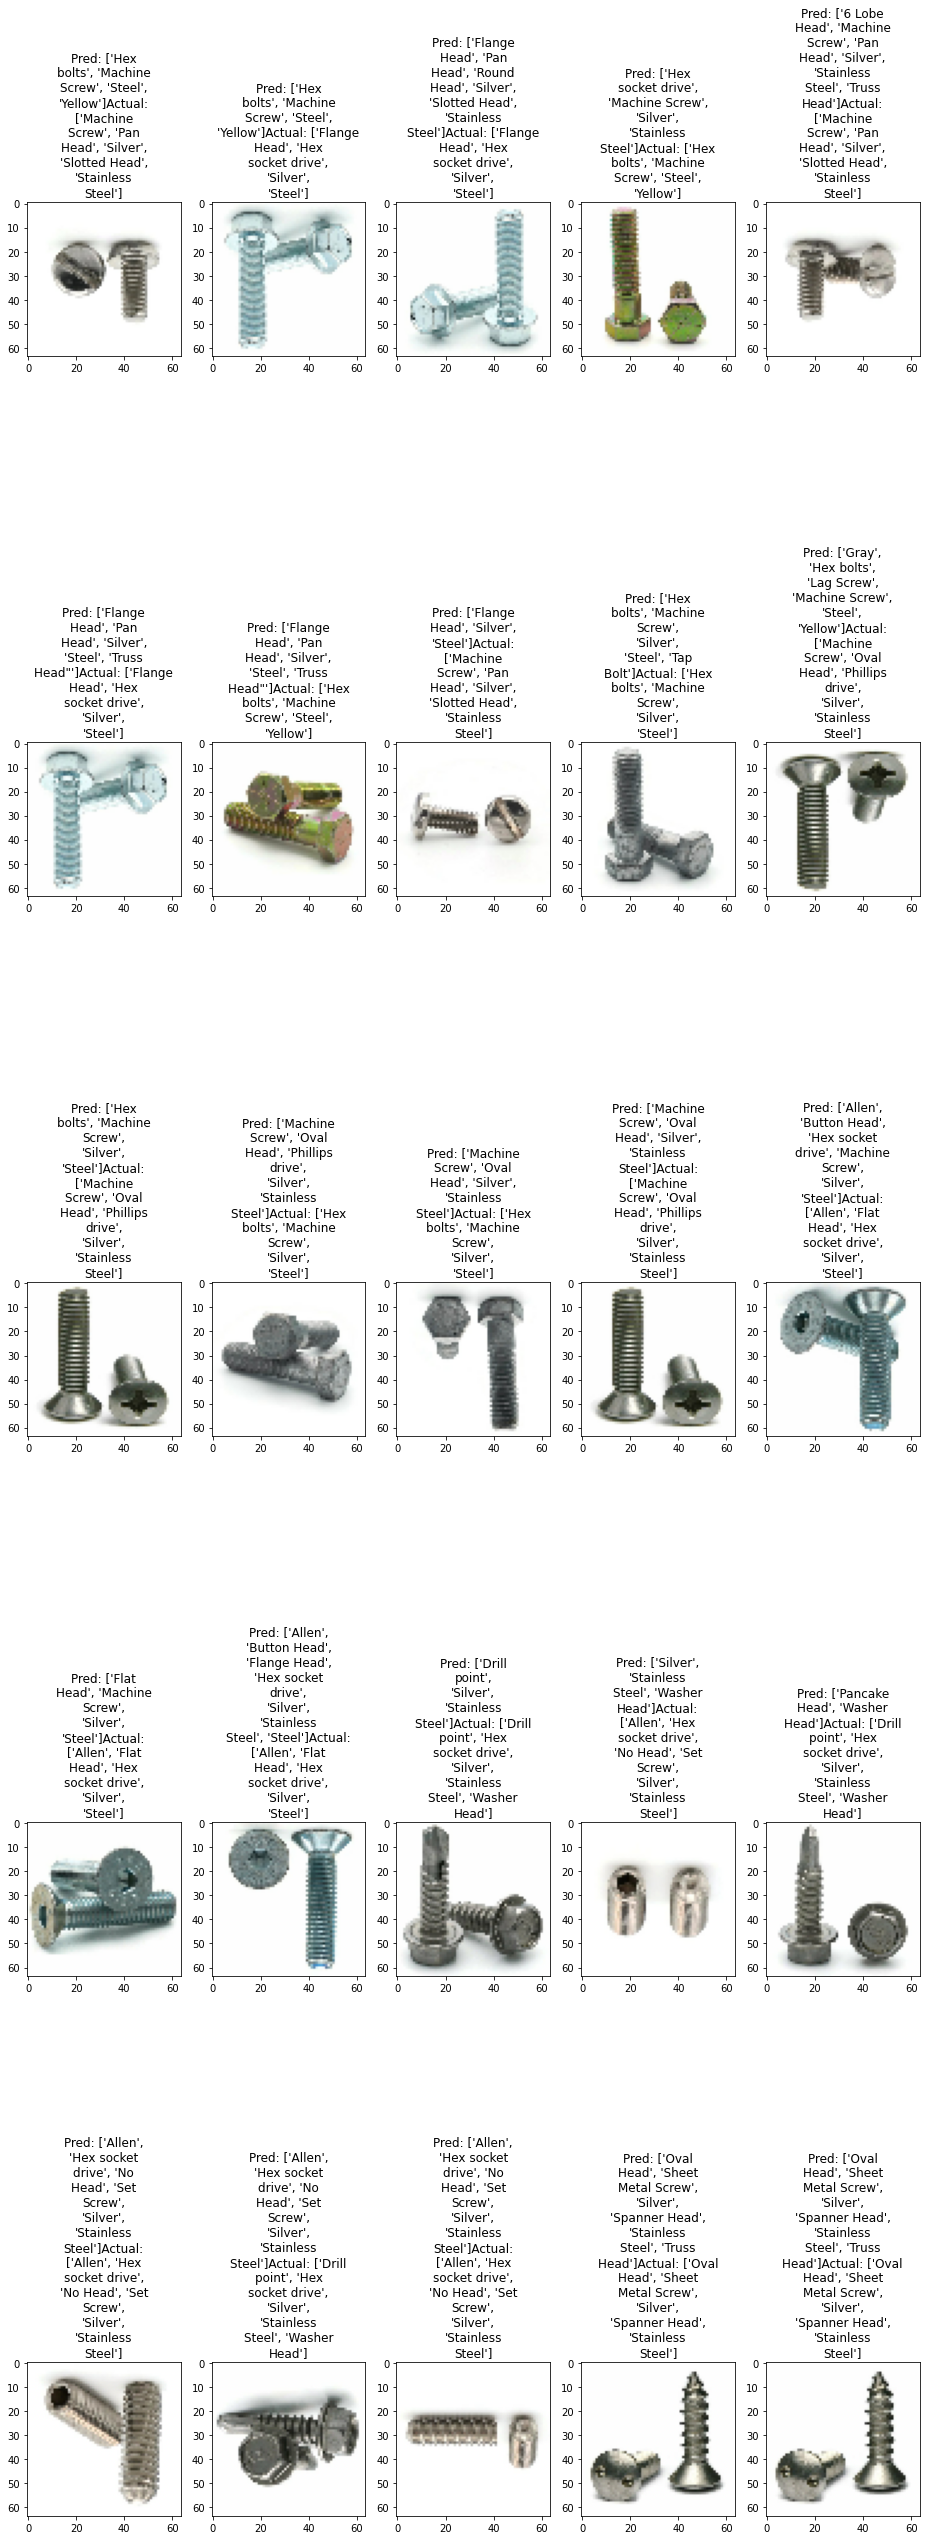

In [30]:
from textwrap import wrap

def show_samples(dataset):
    fig=plt.figure(figsize=(16, 16))
    fig.set_figheight(48)
    columns = 5
    rows = 5
    print(columns*rows,"samples from the dataset")
    predictions= model.predict(dataset.batch(batch_size=columns*rows).take(1))
    i=1
    for (pred, (a,b)) in zip(predictions, dataset.take(columns*rows)):
        fig.add_subplot(rows, columns, i)
        plt.imshow(np.squeeze(a))
        pred[pred>0.5]=1
        pred[pred<=0.5]=0
        plt.title('\n'.join(wrap("Pred: "+ str(covert_onehot_string_labels(LABELS, pred)), 16)) + '\n'.join(wrap("Actual: "+str(covert_onehot_string_labels(LABELS, b.numpy())), 16)))
        i=i+1
    plt.show()


show_samples(ds_val)

#### Export model

In [ ]:
from datetime import date

export_path = f"./models/{date.today().isoformat()}_{str(int(time.time()))}"
model.save(export_path, save_format='tf')

export_path

INFO:tensorflow:Assets written to: ./models/2021-11-07_1636282759\assets


INFO:tensorflow:Assets written to: ./models/2021-11-07_1636282759\assets


'./models/2021-11-07_1636282759'

In [ ]:
# import os
# # os.listdir("./models/")
# print(len(next(os.walk('./models/'))[1]))

In [ ]:
# reloaded = tf.keras.models.load_model(export_path)

In [ ]:
# result_batch = model.predict(image_batch)
# reloaded_result_batch = reloaded.predict(image_batch)

## Test

In [44]:
import glob, os
test_data_dir = "./inputs/misumi_dataset_cleansing/set_screws/"
test_filenames = glob.glob(os.path.join(test_data_dir, "*.jpg"))

In [45]:
test_ds_size = len(test_filenames)
print("Number of images in folders: ", test_ds_size)

test_filelist_ds = tf.data.Dataset.from_tensor_slices(test_filenames[:])

test_ds_size=test_filelist_ds.cardinality().numpy()
print("Number of selected samples for dataset: ", test_ds_size)

Number of images in folders:  188
Number of selected samples for dataset:  188


In [46]:
test_filenames[:5]

['./inputs/misumi_dataset_cleansing/set_screws\\000001.jpg',
 './inputs/misumi_dataset_cleansing/set_screws\\000002.jpg',
 './inputs/misumi_dataset_cleansing/set_screws\\000003.jpg',
 './inputs/misumi_dataset_cleansing/set_screws\\000004.jpg',
 './inputs/misumi_dataset_cleansing/set_screws\\000005.jpg']

In [47]:
train_ratio = 1
ds_test=test_filelist_ds.take(ds_size*train_ratio)

In [48]:
ds_test=ds_test.map(lambda x: tf.py_function(func=combine_images_labels,
          inp=[x], Tout=(tf.float32,tf.int64)),
          num_parallel_calls=tf.data.AUTOTUNE,
          deterministic=False)

In [49]:
ds_test_batched=ds_test.batch(BATCH_SIZE).cache().prefetch(tf.data.experimental.AUTOTUNE)

print("Number of batches in test: ", ds_test_batched.cardinality().numpy())

Number of batches in test:  3


In [50]:
ds= ds_test_batched
print("Test Accuracy: ", model.evaluate(ds)[1])

3/3 [==============================] - 72s 23s/step - loss: 1.4400 - binary_accuracy: 0.9191
Test Accuracy:  0.9191370010375977


In [51]:
ds=ds_test
predictions= model.predict(ds.batch(batch_size=50).take(1))
i = 1
print("50 Sample predictions:")
for (pred,(a,b)) in zip(predictions,ds.take(50)):
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    print(str(i) + ": predicted: " , str(covert_onehot_string_labels(LABELS, pred)))
    i +=1

50 Sample predictions:
1: predicted:  ['Allen', 'Aluminum', 'Flat Head', 'Hex socket drive', 'No Head', 'Silver', 'Stainless Steel']
2: predicted:  ['Allen', 'Aluminum', 'Button Head', 'Hex socket drive', 'Machine Screw', 'No Head', 'Serrated Flange Bolt', 'Silver', 'Stainless Steel', 'Tap Bolt']
3: predicted:  ['Allen', 'Aluminum', 'Black', 'Button Head', 'Flat Head', 'Hex socket drive', 'Machine Screw', 'No Head', 'Silver', 'Stainless Steel', 'Star Drive Head', 'Tamper Proof Head', 'Torx 6 Lobe Screw']
4: predicted:  ['Allen', 'Hex socket drive', 'No Head', 'Set Screw', 'Silver', 'Stainless Steel']
5: predicted:  ['Framing Drywall Screw', 'Pancake Head', 'Round Head', 'Slotted Head']
6: predicted:  ['Allen', 'Flat Head', 'Hex socket drive', 'No Head', 'Set Screw', 'Silver', 'Stainless Steel']
7: predicted:  ['Allen', 'Black', 'Button Head', 'Flat Head', 'Hex socket drive', 'Machine Screw', 'Silver', 'Stainless Steel', 'Star Drive Head']
8: predicted:  ['Allen', 'Black', 'Flat Head', 

25 samples from the dataset


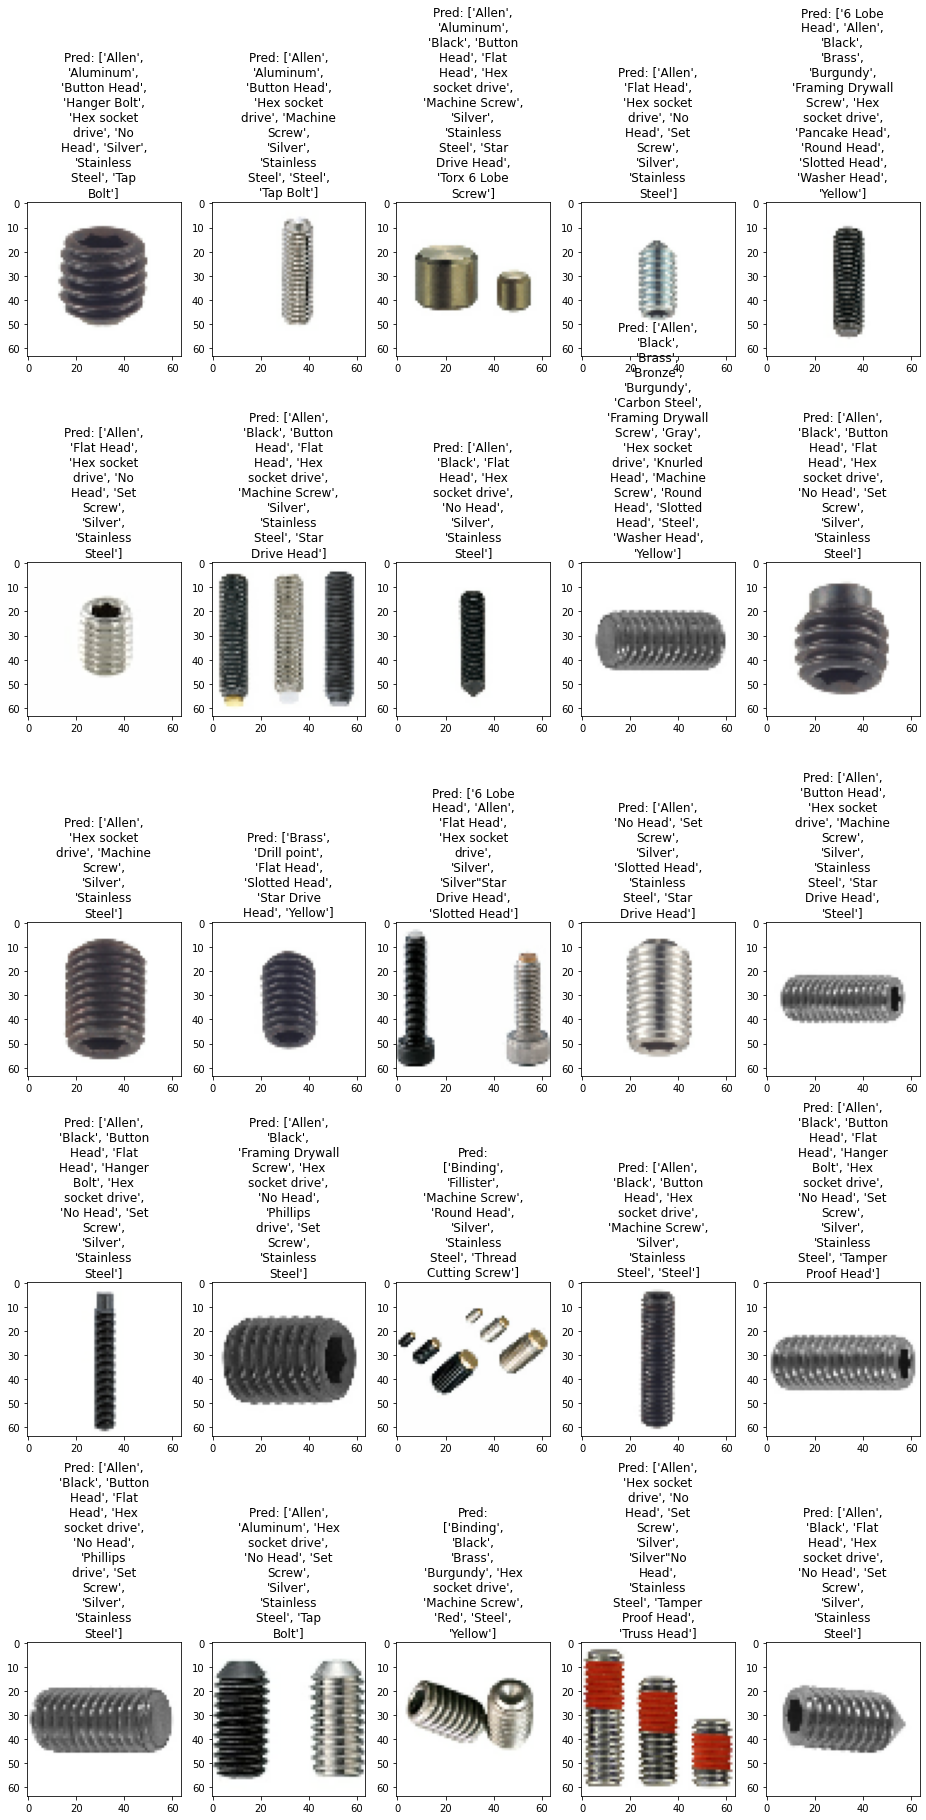

In [52]:
from textwrap import wrap

def show_samples(dataset):
    fig=plt.figure(figsize=(16, 16))
    fig.set_figheight(32)
    columns = 5
    rows = 5
    print(columns*rows,"samples from the dataset")
    predictions= model.predict(dataset.batch(batch_size=columns*rows).take(1))
    i=1
    for (pred, (a,b)) in zip(predictions, dataset.take(columns*rows)):
        fig.add_subplot(rows, columns, i)
        plt.imshow(np.squeeze(a))
        pred[pred>0.5]=1
        pred[pred<=0.5]=0
        plt.title('\n'.join(wrap("Pred: "+ str(covert_onehot_string_labels(LABELS, pred)), 16)))
        i=i+1
    plt.show()

show_samples(ds_test)